In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

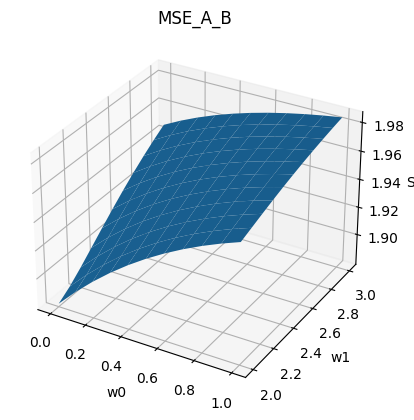

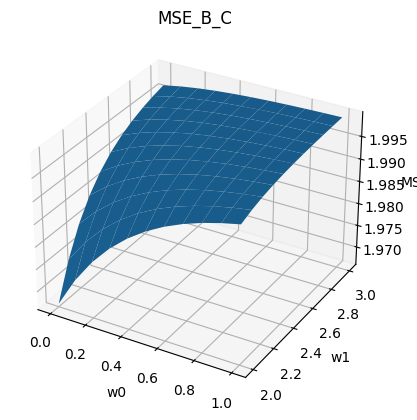

In [33]:
#The data in the project is given by small matrix, thus we initialise it manualy.
#'f8' stands for 64-bit float.
data_input = np.array([(1.0, 1.3, 2.6, 0),
                       (2.2, 1.1, 1.2, 1),
                       (2.0, 2.4, 3.8, 1),
                       (1.5, 3.2, 2.1, 0),
                       (3.2, 1.2, 4.2, 1)],
                       dtype = {'names': ('A','B','C','Y'),
                                'formats': ('f8','f8','f8','i8')})

#Define the number of input parameters (the constant from a probem description).
number_of_argument = 11

#Define w_0 and w_1 weights.
input_weights_w_0 = np.linspace(0, 1, number_of_argument)
input_weights_w_1 = np.linspace(2, 3, number_of_argument)

#Define A, B, Y and B, C, Y matrices fro the input.
data_A_B_Y = data_input[['A', 'B', 'Y']].copy()
data_B_C_Y = data_input[['B', 'C', 'Y']].copy()

#Define the MSE_matrix which has in the row (w_0, w_1, MSE(w0,w1)).
MSE_matrix_A_B = []  
MSE_matrix_B_C = []

#For each fixed w_0,w_1 we compute the MSE of the model and 
#save the triple (w_0, w_1, MSE(w_0, w_1)) to the MSE_matrix_A_B / _B_C.
for i in input_weights_w_0:
    for j in input_weights_w_1:
        
        #Define the model prediction function.
        M = lambda x_0, x_1 : 1 / (1 + np.exp(-(i*x_0 + j*x_1)))
        
        #Define helper variables for the MSE count for fixed weights w_0 and w_1.
        local_variable1 = 0
        local_variable2 = 0
        
        #Loop for A, B, Y data.
        for z in data_A_B_Y:
            local_variable1 += (z[2] - M(z[0], z[1]))**2
        
        #Loop for B, C, Y data.
        for z in data_B_C_Y:
            local_variable2 += (z[2] - M(z[0], z[1]))**2
            
        MSE_matrix_A_B.append([i, j, local_variable1])
        MSE_matrix_B_C.append([i, j, local_variable2])
        
#Convert MSE_matrix_A_B / B_C to the np.arry type 
#for the further computations.
MSE_matrix_A_B = np.array(MSE_matrix_A_B)
MSE_matrix_B_C = np.array(MSE_matrix_B_C)

#Make a grid of the weights for the 3D plotting of the result.
[w0,w1] = np.meshgrid(input_weights_w_0, input_weights_w_1)

#Define two matrices result_column_A_B / B_C for 
#the graph plotting. These matrices will have the same
#shape as the w0 and w1 from the meshgrid and they will
#keep the matching answer in the sense: for each i,j
#the triple (w0[i][j], w1[i][j], result_column_A_B[i][j])
#will be the same as the corresponding triple in the MSE_matrix_A_B.
result_column_A_B = np.zeros((11,11))
result_column_B_C = np.zeros((11,11))

#Here we find the values of those two matrices.
for i in range(11):
    for j in range(11):
        result_column_A_B[i][j] = MSE_matrix_A_B[number_of_argument * i + j][2]
        result_column_B_C[i][j] = MSE_matrix_B_C[number_of_argument * i + j][2]

#Plotting the MSE_A_B.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(title = 'MSE_A_B', zlabel='SE', xlabel='w0', ylabel='w1')
ax.plot_surface(w0,w1 ,result_column_A_B)

#Plotting the MSE_B_C.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(title = 'MSE_B_C', zlabel='MSE', xlabel='w0', ylabel='w1')
ax.plot_surface(w0,w1 ,result_column_B_C)
